# Imports

In [22]:
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Definitions

In [7]:
benchmarks = ['gcc', 'lbm', 'mcf', 'namd', 'xalancbmk']
prefetchers = ['none', 'simple', 'power4', 'bingo']

# Data Parser

In [17]:
def parse_file(file_path, metrics):
    result = {}

    with open(file_path, 'r') as file:
        content = file.read()

        for metric_name, regex_pattern in metrics.items():
            regex = re.compile(regex_pattern)
            match = regex.search(content)

            if match:
                result[metric_name] = float(match.group(1))

    return result

metrics = {
    "IPC": r"IPC\s*=\s*([\d.]+)\s*in terms of micro-ops",
    "L3 Hit-Rate": r"L3 Hit-Rate\s*=\s*([0-9\.E-]+)",
}

result = {}

for benchmark in benchmarks:
    result[benchmark] = {}

    for prefetcher in prefetchers:
        file_path = f"outputs/{benchmark}.{prefetcher}.stat"
        result[benchmark][prefetcher] = parse_file(file_path, metrics)
        
result

{'gcc': {'none': {'IPC': 1.4764, 'L3 Hit-Rate': 0.0},
  'simple': {'IPC': 1.7036, 'L3 Hit-Rate': 0.11399577},
  'power4': {'IPC': 1.5926, 'L3 Hit-Rate': 0.19521853},
  'bingo': {'IPC': 1.4669, 'L3 Hit-Rate': 0.0065835067}},
 'lbm': {'none': {'IPC': 1.3903, 'L3 Hit-Rate': 3.4771725e-05},
  'simple': {'IPC': 2.653, 'L3 Hit-Rate': 0.31948748},
  'power4': {'IPC': 2.1617, 'L3 Hit-Rate': 0.42447844},
  'bingo': {'IPC': 1.3912, 'L3 Hit-Rate': 0.00070650096}},
 'mcf': {'none': {'IPC': 1.2884, 'L3 Hit-Rate': 0.01001564},
  'simple': {'IPC': 1.4134, 'L3 Hit-Rate': 0.20052975},
  'power4': {'IPC': 1.6201, 'L3 Hit-Rate': 0.3792435},
  'bingo': {'IPC': 1.2889, 'L3 Hit-Rate': 0.011156765}},
 'namd': {'none': {'IPC': 3.9798, 'L3 Hit-Rate': 0.0},
  'simple': {'IPC': 4.6932, 'L3 Hit-Rate': 0.1875},
  'power4': {'IPC': 4.4688, 'L3 Hit-Rate': 0.28048348},
  'bingo': {'IPC': 3.9729, 'L3 Hit-Rate': 0.01834452}},
 'xalancbmk': {'none': {'IPC': 0.311, 'L3 Hit-Rate': 0.0},
  'simple': {'IPC': 0.6492, 'L3 Hit

# Plotter

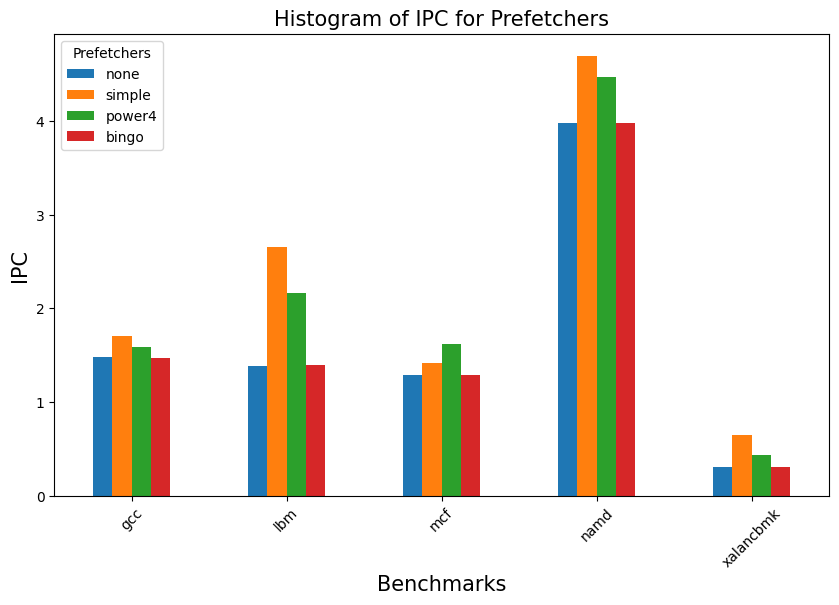

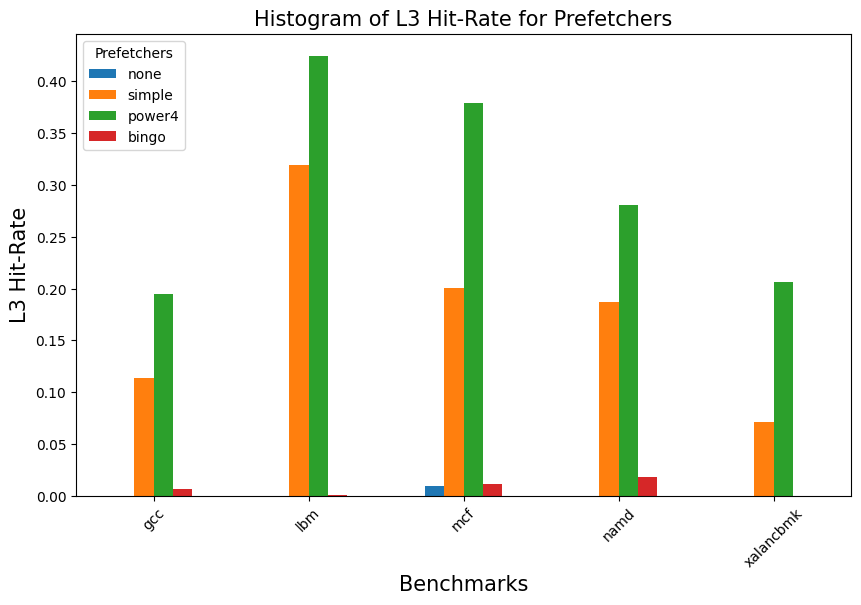

In [31]:
metric_data = {}

for metric in metrics:
    benchmark_data = {}
    for benchmark in benchmarks:
        benchmark_data[benchmark] = []
        for prefetcher in prefetchers:
            benchmark_data[benchmark].append(result[benchmark][prefetcher][metric])
    benchmarks_data = pd.DataFrame(benchmark_data, index=prefetchers)
    metric_data[metric] = benchmarks_data


for metric, df in metric_data.items():
    df = df.T
    ax = df.plot(kind='bar', figsize=(10, 6))
    ax.set_xlabel('Benchmarks', fontdict={'fontsize': 15})
    ax.set_ylabel(metric, fontdict={'fontsize': 15})
    ax.set_title(f'Histogram of {metric} for Prefetchers', fontdict={'fontsize': 15})
    plt.xticks(rotation=45)
    plt.legend(title='Prefetchers', loc='upper left')
    plt.savefig(f'plots/{metric}.png', bbox_inches='tight')
    plt.show()